In [5]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


path_download = 'C:/Users/Felix/Downloads/' # path to download folder
data = pd.read_csv(path_download + 'results_n94.csv', sep=';') # read csv file

In [7]:
colnames = data.columns.tolist() # get column names
for s in ['threat', 'disgust', 'fast']:
    colnames_o = [c for c in colnames if s in c] # get threat columns
    data.rename(columns={c: s + '_' + data[c][0].lower() for c in colnames_o}, inplace=True) # rename column

In [8]:
data['rowid'] = data.index
# remove first row
data = data.iloc[1:]
data_c = pd.wide_to_long(data, 
                stubnames=['threat', 'disgust', 'fast'],
                i="ID",
                j="animal",
                sep='_',
                suffix='\w+').sort_values(by=['ID', 'animal']).reset_index()

In [27]:
# change dtype of threat, disgust, fast to int
data_c['threat'] = data_c['threat'].astype(int)
data_c['disgust'] = data_c['disgust'].astype(int)
data_c['fast'] = data_c['fast'].astype(int)

# add column "group" to data_c, set group to "threat" if animal is in ['crocodile', 'wolf', 'snake', scorpion'], to "nonthreat" if animal is in ['cpig', 'rabbit', 'goat', 'turtle'] and to 'discarded' otherwise
data_c['group'] = (data_c['animal']
                    .apply(lambda x: 'threat' if x in ['crocodile', 'wolf', 'snake', 'scorpion'] else 'nonthreat' if x in ['pig', 'rabbit', 'goat', 'turtle'] else 'discarded')
                    )


,ID,animal,Age,pořadí,rowid,Native language,Years of education,Sex,threat,disgust,fast,group
0,21655.0,bird,25.0,94.0,94,Italian,14.0,Male,1,1,6,discarded
1,21655.0,chicken,25.0,94.0,94,Italian,14.0,Male,5,1,5,discarded
2,21655.0,crocodile,25.0,94.0,94,Italian,14.0,Male,6,1,3,threat
3,21655.0,doe,25.0,94.0,94,Italian,14.0,Male,1,1,4,discarded
4,21655.0,goat,25.0,94.0,94,Italian,14.0,Male,1,1,3,nonthreat
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,21871.0,snake,18.0,1.0,1,"English,Polish",12.0,Female,3,5,5,threat
1406,21871.0,spider,18.0,1.0,1,"English,Polish",12.0,Female,1,1,1,discarded
1407,21871.0,squirrel,18.0,1.0,1,"English,Polish",12.0,Female,2,3,1,discarded
1408,21871.0,turtle,18.0,1.0,1,"English,Polish",12.0,Female,1,1,2,nonthreat


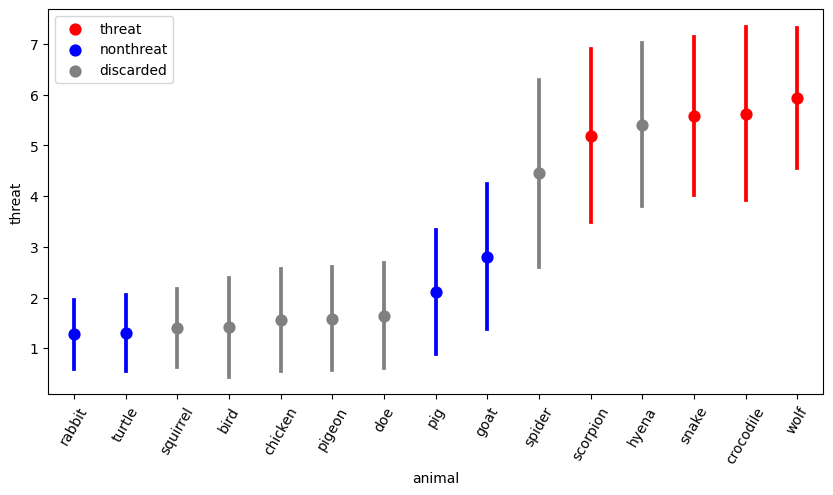

In [47]:



# plot threat as a function of animal, show mean plus std, use pointplot, sort increasing, do not connect points, rotate xticks by 60 degrees
fig, ax = plt.subplots(figsize=(10, 5))
(sns.pointplot(
    x='animal', y='threat', hue='group', data=data_c, errorbar='sd', join=False, 
    order=(data_c.groupby('animal')['threat']
                .mean()
                .sort_values()
                .index
           ), palette={'threat': 'red',
                       'nonthreat': 'blue', 'discarded': 'grey'},
    ax=ax)
    
    .set_xticklabels((data_c.groupby('animal')['threat']
                            .mean()
                            .sort_values()
                            .index),
                      rotation=60)
)
# reorder legend entries to the sequence threat, nonthreat, discarded
handles, labels = ax.get_legend_handles_labels()
# find positions of 'threat', 'nonthreat', 'discarded' in labels
threat_pos = labels.index('threat')
nonthreat_pos = labels.index('nonthreat')
discarded_pos = labels.index('discarded')
# reorder handles and labels
ax.legend(handles=[handles[i] for i in [threat_pos, nonthreat_pos, discarded_pos]],
          labels=[labels[i] for i in [threat_pos, nonthreat_pos, discarded_pos]])
